## **🏅 Pandas Assignment: Exploring the Tokyo 2021 Olympics Dataset**

### **Problem Statement**

The 2021 Tokyo Olympics dataset provides details about athletes, their countries, sports, and medals won. Your task is to **explore this dataset using Pandas** and generate **10 valuable insights** that reveal interesting patterns, trends, or comparisons about the Olympics.

You should not just describe the data, but also **ask meaningful questions** and answer them with Pandas operations.

### **Requirements**

1. Download and load the dataset from [Tokyo 2021 Olympics Dataset](https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo).
2. Use **Pandas** to clean, transform, and analyze the data.
3. Come up with **10 insights**, such as (but not limited to):
    - Medal distribution by country
    - Gender participation and medal trends
    - Most successful athletes or teams
    - Sports with the highest competition levels
    - Comparisons between continents/regions
    - Medal tallies over sports categories
    - Height/weight distribution of medalists vs. non-medalists
    - Age distribution of athletes across sports
4. Each insight should be backed by:
    - A clear question you are trying to answer
    - The Pandas code you used
    - The resulting output (tables/aggregates/plots)

In [100]:
import pandas as pd
import glob
import seaborn as sns

path = "data"

athletes_file = glob.glob(path + "/Athletes.xlsx")
coaches_file = glob.glob(path + "/Coaches.xlsx")
medals_file = glob.glob(path + "/Medals.xlsx")
teams_file = glob.glob(path + "/Teams.xlsx")
entriesGender_file = glob.glob(path + "/EntriesGender.xlsx")



In [101]:
athletes_df = pd.read_excel(athletes_file[0])
athletes_df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [102]:
coaches_df = pd.read_excel(coaches_file[0])
coaches_df.head()


/Users/dev/Documents/GitHub/machine-learning/.venv/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [103]:
medals_df = pd.read_excel(medals_file[0])
medals_df.head()


/Users/dev/Documents/GitHub/machine-learning/.venv/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [104]:
teams_df = pd.read_excel(teams_file[0])
teams_df.head()


,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [105]:
entriesGender_df = pd.read_excel(entriesGender_file[0])
entriesGender_df.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [106]:
medals_top = medals_df.nlargest(15, "Total")[["Team/NOC", "Gold", "Silver", "Bronze", "Total"]]
medals_top
# sns.barplot(x="Total", y="Team/NOC", data=medals_top)

,Team/NOC,Gold,Silver,Bronze,Total
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
4,ROC,20,28,23,71
3,Great Britain,22,21,22,65
2,Japan,27,14,17,58
5,Australia,17,7,22,46
9,Italy,10,10,20,40
8,Germany,10,11,16,37
6,Netherlands,10,12,14,36
7,France,10,12,11,33


<Axes: xlabel='Team/NOC', ylabel='Share'>

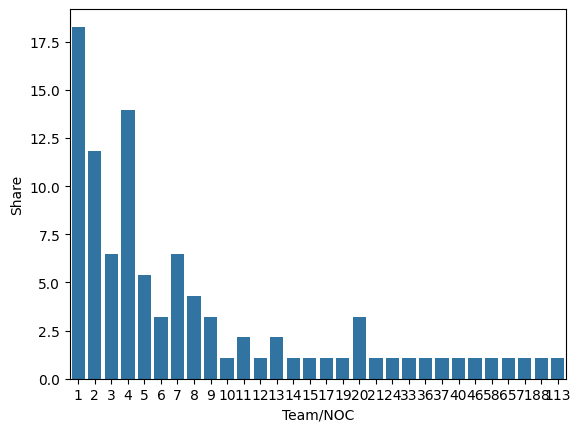

In [107]:
medals_share = medals_df["Total"].value_counts(normalize=True) * 100
medals_share = medals_share.reset_index()
medals_share.columns = ["Team/NOC", "Share"]
medals_share
sns.barplot(x="Team/NOC", y="Share", data=medals_share)

In [108]:
gold_conc = medals_top.assign(GoldShare=lambda d: (d["Gold"] / d["Total"] * 100).round(2))
gold_conc[["Team/NOC", "Gold", "Total", "GoldShare"]].sort_values("GoldShare", ascending=False)

,Team/NOC,Gold,Total,GoldShare
2,Japan,27,58,46.55
1,People's Republic of China,38,88,43.18
5,Australia,17,46,36.96
12,New Zealand,7,20,35.00
0,United States of America,39,113,34.51
3,Great Britain,22,65,33.85
11,Brazil,7,21,33.33
7,France,10,33,30.30
14,Hungary,6,20,30.00
15,Republic of Korea,6,20,30.00


In [109]:
silver_gold = medals_top.assign(SilverToGold=lambda d: (d["Silver"] / d["Gold"]).replace([float("inf")], None))
silver_gold[["Team/NOC", "Gold", "Silver", "SilverToGold"]].sort_values("SilverToGold", ascending=False)

,Team/NOC,Gold,Silver,SilverToGold
4,ROC,20,28,1.400000
6,Netherlands,10,12,1.200000
7,France,10,12,1.200000
14,Hungary,6,7,1.166667
8,Germany,10,11,1.100000
0,United States of America,39,41,1.051282
9,Italy,10,10,1.000000
3,Great Britain,22,21,0.954545
10,Canada,7,6,0.857143
11,Brazil,7,6,0.857143


In [110]:
gender_totals = entriesGender_df[["Female", "Male"]].sum()
gender_totals.to_frame(name="Participants")


,Participants
Female,5432
Male,5884


In [111]:
gender_gap = entriesGender_df.assign(Gap=lambda d: (d["Female"] - d["Male"]).abs())
gender_gap[["Discipline", "Female", "Male", "Gap"]].sort_values("Gap", ascending=False).head(15)

,Discipline,Female,Male,Gap
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,103
45,Wrestling,96,193,97
28,Rhythmic Gymnastics,96,0,96
9,Boxing,102,187,85
20,Football,264,344,80
15,Cycling Road,70,131,61
36,Swimming,361,418,57
6,Baseball/Softball,90,144,54
18,Equestrian,73,125,52


In [112]:
entriesGender_df.sort_values("Total", ascending=False)[["Discipline", "Total"]].head(15)

,Discipline,Total
4,Athletics,2041
36,Swimming,779
20,Football,608
29,Rowing,522
24,Judo,393
23,Hockey,384
32,Shooting,356
31,Sailing,350
22,Handball,336
30,Rugby Sevens,297


In [113]:
team_counts = teams_df.groupby("Name", as_index=False).size().rename(columns={"size": "TeamEntries"})
team_counts.sort_values("TeamEntries", ascending=False).head(15)

,Name,TeamEntries
75,Japan,45
135,United States,43
73,Italy,34
50,Germany,32
47,France,32
10,Australia,32
115,ROC,31
30,China,30
55,Great Britain,28
26,Canada,27


In [114]:
team_gender = teams_df.pivot_table(index="Name", columns="Event", values="Discipline", aggfunc="count", fill_value=0)
team_gender = team_gender.assign(Total=team_gender.sum(axis=1)).sort_values("Total", ascending=False).head(15)
team_gender

Event,4 x 400m Relay Mixed,Baseball,Duet,Group All-Around,Men,Men's 4 x 100m Freestyle Relay,Men's 4 x 100m Medley Relay,Men's 4 x 100m Relay,Men's 4 x 200m Freestyle Relay,Men's 4 x 400m Relay,...,Women's 4 x 200m Freestyle Relay,Women's 4 x 400m Relay,Women's Foil Team,Women's Madison,Women's Sabre Team,Women's Team,Women's Team Pursuit,Women's Team Sprint,Women's Épée Team,Total
Name,,,,,,,,,,,,,,,,,,,,,
Japan,0,1,1,1,8,1,1,1,1,1,...,1,0,1,1,1,3,0,0,0,45
United States,1,1,1,1,4,1,1,1,1,1,...,1,1,1,1,1,3,1,0,1,43
Italy,1,0,1,1,3,1,1,1,1,1,...,1,1,1,1,1,2,1,0,1,34
Germany,1,0,0,0,4,1,1,1,1,1,...,1,1,0,1,0,3,1,1,0,32
France,0,0,1,0,4,1,1,1,1,1,...,1,1,1,1,1,2,1,0,0,32
Australia,0,0,1,1,5,1,1,0,1,0,...,1,1,0,1,0,1,1,0,0,32
ROC,0,0,1,1,2,1,1,0,1,0,...,1,0,1,1,1,2,0,1,1,31
China,0,0,1,1,1,0,1,1,1,0,...,1,0,0,0,1,3,0,1,1,30
Great Britain,1,0,1,0,2,1,1,1,1,1,...,0,1,0,1,0,2,1,0,0,28


In [115]:
coaches_by_noc = coaches_df.groupby("NOC", as_index=False).size().rename(columns={"size": "Coaches"}).sort_values("Coaches", ascending=False).head(15)
coaches_by_disc = coaches_df.groupby("Discipline", as_index=False).size().rename(columns={"size": "Coaches"}).sort_values("Coaches", ascending=False).head(15)
coaches_by_noc, coaches_by_disc

(                           NOC  Coaches
 30                       Japan       35
 58    United States of America       28
 53                       Spain       28
 2                    Australia       22
 9                       Canada       16
 29                       Italy       14
 44                         ROC       12
 17                       Egypt       12
 52                South Africa       12
 40  People's Republic of China       12
 1                    Argentina       11
 36                 Netherlands       10
 19                      France       10
 59                   Venezuela       10
 20                     Germany        9,
           Discipline  Coaches
 2         Basketball       74
 0  Artistic Swimming       69
 3           Football       59
 5             Hockey       45
 7         Volleyball       45
 4           Handball       29
 1  Baseball/Softball       26
 6       Rugby Sevens       25
 8         Water Polo       22)